<a href="https://colab.research.google.com/github/Arsham-Vosoughinia/Arsham-Vosoughinia-Clustering-Genders-based-on-Open-Sex-Role-Survey-t/blob/main/GnderCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install holoviews==1.12.7
!pip install -U ipykernel
!pip install umap-learn
! pip install dataprep

In [ ]:
!pip install datashader
!pip install bokeh
!pip install holoviews

In [ ]:
# Importing needed libraries

import numpy as np
import matplotlib.pyplot as plt
import time
import umap  

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
from sklearn import datasets, metrics
import plotly.express as px

from sklearn.decomposition import PCA
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture



from dataprep.eda import plot, plot_correlation, create_report, plot_missing
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd

from google.colab import files

NumExpr defaulting to 4 threads.


In [ ]:
import umap.plot

In [ ]:
import matplotlib.patches as mpatches


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

The Bem Sex-Role Inventory is one of the most popular measures used to study gender differences in personality. It measures masculinity and femininity as two separate scales. This contrasts to most earlier tests that conceptualized masculinity as the opposite of femininity and measured on one scale.

The BSRI is copyrighted and commercialized by Consulting Psychologists Press, Inc. so an open-source version is needed.

(https://openpsychometrics.org/tests/OSRI/development/)

In [ ]:
dforg= pd.read_csv('/content/data.csv')  # reading the excel file 

In [ ]:
dforg.size

18158661

In [ ]:
df=dforg.copy()

In [ ]:
df.info()

In [ ]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,1,5,5,5,1,1,1,5,1,5,1,5,4,5,1,5,1,5,1,5,1,5,1,5,1,3,1,5,1,4,1,5,1,5,579,211,US,1,1,1,18,2,2,2,6,1,1
1,1,5,1,1,1,4,5,1,5,5,4,3,1,4,5,2,5,4,4,2,5,4,5,3,1,3,5,1,1,1,1,1,3,4,3,3,5,2,5,3,5,5,5,3,63,242,PE,1,0,1,19,2,1,2,6,1,2
2,1,4,3,3,2,5,2,5,2,3,5,1,1,3,3,2,1,4,2,3,1,3,5,1,1,5,2,4,1,3,1,1,5,4,3,2,5,5,1,4,2,1,3,3,24,265,CH,1,0,2,18,2,2,1,1,1,1
3,1,1,4,4,5,4,5,5,4,2,1,4,4,2,4,2,5,2,2,3,2,4,2,4,5,2,4,4,1,1,5,4,5,5,4,2,1,4,2,3,4,1,4,3,3,231,US,1,1,1,19,3,2,1,6,2,1
4,1,2,3,4,3,3,5,1,3,2,4,1,1,3,4,1,4,4,3,1,4,2,5,2,2,2,4,1,2,1,2,1,1,2,2,4,4,3,3,1,1,3,4,3,25,274,US,2,1,1,16,2,1,1,6,2,1


In [ ]:
df.shape

(318573, 57)

In [ ]:
df=df[df['engnat'].isin([1,2])] # removing non native or non bilingual participants 

In [ ]:
df=df[df['gender'].isin([1,2])] # removing non male or female participants from target variable gender

In [ ]:
dfs_O=df.sample(50000, random_state=132) # sampleing the dataset for faster computation

In [ ]:
dfs_O.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.965980,3.80860,2.948040,3.188120,2.893240,3.708740,3.321200,3.275740,2.752980,3.62554,2.759520,2.829380,2.667300,3.38916,3.183920,2.943220,2.60718,3.447340,2.826640,3.656660,2.842560,3.530120,4.068480,3.361500,2.021920,2.962600,2.681120,2.802260,2.554540,2.925340,3.023520,2.800780,2.747260,2.937920,3.053300,2.73854,3.698280,2.770500,2.647600,2.925860,3.425740,2.679440,2.644240,2.905820,8.998262e+02,7.556869e+02,3.204440,0.904100,1.214100,2.038158e+03,2.257560,1.544460,1.746820,5.042840,2.246060,1.164360
std,1.374969,1.56903,1.683353,1.497269,1.558593,1.354705,1.489669,1.399638,1.549532,1.26331,1.452905,1.584512,1.564589,1.51100,1.522439,1.589933,1.63877,1.425562,1.481158,1.449793,1.381858,1.398418,1.218909,1.424254,1.310097,1.512378,1.498186,1.527719,1.639134,1.505899,1.439781,1.672025,1.399293,1.571266,1.561816,1.45215,1.479746,1.466026,1.661875,1.488787,1.446267,1.560029,1.534654,1.521432,5.291775e+04,1.898704e+04,10.887195,1.170543,0.410201,4.472256e+05,0.810874,0.498024,1.118528,1.889793,2.044064,0.443069
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.900000e+01,1.000000,0.000000,1.000000,1.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.00000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,1.00000,2.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000e+00,1.960000e+02,1.000000,0.000000,1.000000,1.800000e+01,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000
50%,1.000000,5.00000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.00000,3.000000,3.000000,3.000000,4.00000,4.000000,3.000000,2.00000,4.000000,3.000000,4.000000,3.000000,4.000000,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,3.000000,9.000000e+00,2.490000e+02,1.000000,0.000000,1.000000,2.000000e+01,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000
75%,3.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.00000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,4.00000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.00000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,2.600000e+01,3.290000e+02,1.000000,2.0

In [ ]:
dfs_O['engnat'].value_counts()

1    39295
2    10705
Name: engnat, dtype: int64

In [ ]:
# removing non technical columns and storing it in df_Q (dataset with only the 44 technical Qs)
df_Q=dfs_O.drop(columns=['age',	'education','gender',	'orientation',	'race',	'religion',	'hand' ,'country','introelapse'	,'testelapse'	,'IPC',	'source',	'engnat'])

In [ ]:
#including the demographic and 2 other time related variable to a seperate data set df_R
df_R = dfs_O[['age',	'education',	'orientation',	'hand' ,'introelapse'	,'testelapse']]

In [ ]:
df_Q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44
246264,1,5,5,4,2,3,4,3,1,4,4,3,2,4,4,2,2,2,2,4,3,3,4,5,2,4,4,3,2,2,2,4,2,2,4,3,4,2,3,3,3,2,4,1
287225,1,1,5,1,1,5,4,1,1,3,3,1,5,1,1,1,1,5,1,1,5,1,5,1,1,5,1,1,5,1,3,5,1,1,3,1,5,1,1,1,1,1,1,1
127491,1,2,4,4,5,3,3,3,3,4,2,5,3,5,3,2,1,4,2,4,3,5,4,3,2,4,3,2,1,2,2,2,3,3,3,1,2,4,2,3,3,4,3,1
158862,2,5,5,3,2,2,4,3,4,3,2,1,3,2,5,3,3,5,3,4,2,4,5,2,3,3,4,2,5,1,4,5,3,1,4,1,5,1,4,1,4,1,4,4
155785,2,2,4,5,3,4,4,2,3,2,4,1,1,1,4,2,4,1,5,1,3,4,5,2,3,2,3,2,1,1,1,3,5,1,4,1,5,1,4,2,4,1,2,1


In [ ]:
df_R['orientation'].value_counts()

1    27929
2    11863
3     4994
5     2396
4     2181
0      637
Name: orientation, dtype: int64

In [ ]:
y=dfs_O['gender'] # defining taget variable
X=df_Q # defining X
scaler = preprocessing.MinMaxScaler(feature_range=(1,5)) # scaling demographic columns to 1 to 5 since all other Qs are 1 to 5
X_std_R= scaler.fit_transform(df_R)
X_all= scaler.fit_transform(dfs_O.drop(columns=[	'gender','race',	'religion',	'country','IPC',	'source',	'engnat'])) # removing unwanted other columns
ydf=pd.DataFrame(y) 

In [ ]:
QR=pd.DataFrame(X_all)
QR.shape

(50000, 50)

In [ ]:
QR

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.8,5.0,5.0,4.2,2.6,3.4,4.2,3.4,1.8,4.2,4.2,3.4,2.6,4.2,4.2,2.6,2.6,2.6,2.6,4.2,3.4,3.4,4.2,5.0,2.6,4.2,4.2,3.4,2.6,2.6,2.6,4.2,2.6,2.6,4.2,3.4,4.2,2.6,3.4,3.4,3.4,2.6,4.2,1.8,1.000002,1.000452,1.000001,4.0,1.8,3.666667
1,1.8,1.8,5.0,1.8,1.8,5.0,4.2,1.8,1.8,3.4,3.4,1.8,5.0,1.8,1.8,1.8,1.8,5.0,1.8,1.8,5.0,1.8,5.0,1.8,1.8,5.0,1.8,1.8,5.0,1.8,3.4,5.0,1.8,1.8,3.4,1.8,5.0,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.000003,1.000193,1.000000,2.0,3.4,2.333333
2,1.8,2.6,4.2,4.2,5.0,3.4,3.4,3.4,3.4,4.2,2.6,5.0,3.4,5.0,3.4,2.6,1.8,4.2,2.6,4.2,3.4,5.0,4.2,3.4,2.6,4.2,3.4,2.6,1.8,2.6,2.6,2.6,3.4,3.4,3.4,1.8,2.6,4.2,2.6,3.4,3.4,4.2,3.4,1.8,1.000002,1.000156,1.000000,5.0,5.0,2.333333
3,2.6,5.0,5.0,3.4,2.6,2.6,4.2,3.4,4.2,3.4,2.6,1.8,3.4,2.6,5.0,3.4,3.4,5.0,3.4,4.2,2.6,4.2,5.0,2.6,3.4,3.4,4.2,2.6,5.0,1.8,4.2,5.0,3.4,1.8,4.2,1.8,5.0,1.8,4.2,1.8,4.2,1.8,4.2,4.2,1.000001,1.000387,1.000000,4.0,1.8,2.333333
4,2.6,2.6,4.2,5.0,3.4,4.2,4.2,2.6,3.4,2.6,4.2,1.8,1.8,1.8,4.2,2.6,4.2,1.8,5.0,1.8,3.4,4.2,5.0,2.6,3.4,2.6,3.4,2.6,1.8,1.8,1.8,3.4,5.0,1.8,4.2,1.8,5.0,1.8,4.2,2.6,4.2,1.8,2.6,1.8,1.000003,1.000091,1.000000,3.0,2.6,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.8,3.4,1.8,4.2,4.2,4.2,4.2,2.6,1.8,5.0,2.6,1.8,1.8,5.0,2.6,4.2,2.6,4.2,4.2,2.6,3.4,5.0,4.2,5.0,1.8,4.2,2.6,4.2,1.8,4.2,2.6,3.4,3.4,2.6,3.4,2.6,4.2,3.4,1.8,2.6,4.2,4.2,2.6,4.2,1.000002,1.000137,1.000000,4.0,2.6,2.333333
49996,1.8,3.4,3.4,4.2,1.8,5.0,4.2,5.0,2.6,5.0,4.2,2.6,1.8,1.8,5.0,1.8,1.8,2.6,4.2,5.0,1.8,1.8,3.4,3.4,1.8,2.6,2.6,3.4,1.8,4.2,4.2,5.0,3.4,5.0,2.6,2.6,5.0,2.6,4.2,3.4,5.0,1.8,2.6,4.2,1.000002,1.000254,1.000000,2.0,1.8,2.333333
49997,4.2,4.2,4.2,2.6,3.4,5.0,2.6,2.6,1.8,5.0,2.6,3.4,2.6,5.0,5.0,2.6,1.8,4.2,5.0,3.4,5.0,4.2,5.0,2.6,1.8,4.2,4.2,2.6,1.8,5.0,3.4,1.8,2.6,4.2,4.2,3.4,5.0,3.4,1.8,4.2,4.2,1.8,4.2,1.8,1.000002,1.000102,1.000000,3.0,5.0,2.333333
49998,1.8,4.2,1.8,4.2,4.2,4.2,4.2,4.2,1.8,5.0,4.2,1.8,4.2,4.2,5.0,2.6,1.8,4.2,5.0,5.0,4.2,4.2,5.0,5.0,1.8,1.8,1.8,1.8,2.6,4.2,2.6,1.8,1.8,4.2,4.2,2.6,1.8,1.8,1.8,4.2,2.6,2.6,1.8,1.8,1.000895,1.000339,1.000000,4.0,1.8,2.333333


In [ ]:
QR.head()

In [ ]:
QR.describe()

### FIRST CRITERION (only technical questions Q1 to Q44)

In [ ]:
# assigning principal components
n_components=41  #number of components assigned
pca = PCA(n_components=n_components)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum() * 100)

98.43205034242001


In [ ]:
# there only 2 clusters Male and Female
km = KMeans(n_clusters=2)
#
# Fit the KMeans model
#
kmclusters=km.fit_predict(pca_components)
#
# Calculate Silhoutte Score

In [ ]:
# Calculate Adj-RAND Score
metrics.adjusted_rand_score(y, kmclusters)

0.3244186598959534

In [ ]:
# Calculate Silhoutte Score
metrics.silhouette_score(X, kmclusters, metric='cosine' )

0.22977412166201724

Text(0.5, 1.0, 'Actual vs Predicted Cross Tab')

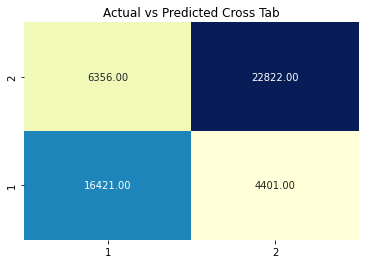

In [ ]:
# creating and ploting the cross tab

pred2 = np.array([1 if x == 1 else 2 if x==2 else 2 for x in kmclusters])

pd.crosstab(y,pred2)

res2 = sns.heatmap(pd.crosstab(y,pred2).T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
res2.set_xticklabels(['1','2'])
res2.set_yticklabels(['2','1'])
plt.ylabel("")
plt.xlabel("")
plt.title("Actual vs Predicted Cross Tab")

In [ ]:
pd.crosstab(y,pred2)


col_0,1,2
gender,,
1,6348,16429
2,22810,4413


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
# Checking other clustering methods
# Defining the agglomerative clustering
opt_cluster = OPTICS(min_samples=2)

# Fit model
clustersopt = opt_cluster.fit_predict(X)

print(metrics.adjusted_rand_score(y, clustersopt))
# print(metrics.silhouette_score(X, clustersdb))
print("")

In [ ]:
# Obtaining multiple umap results for various specifications
for i in (300,330,350,380,400):
  for j in (0.00001,0.001,0.01,0.1):
    umap_results = umap.UMAP(n_neighbors=i, min_dist=j, metric= 'correlation').fit_transform(X)
    print(i)
    print(j)
    fig = px.scatter(umap_results, x=0, y=1, color=y)
    fig.show()
# print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

Text(0.5, 1.0, 'UMAP clustering solely based on non-demographic questions')

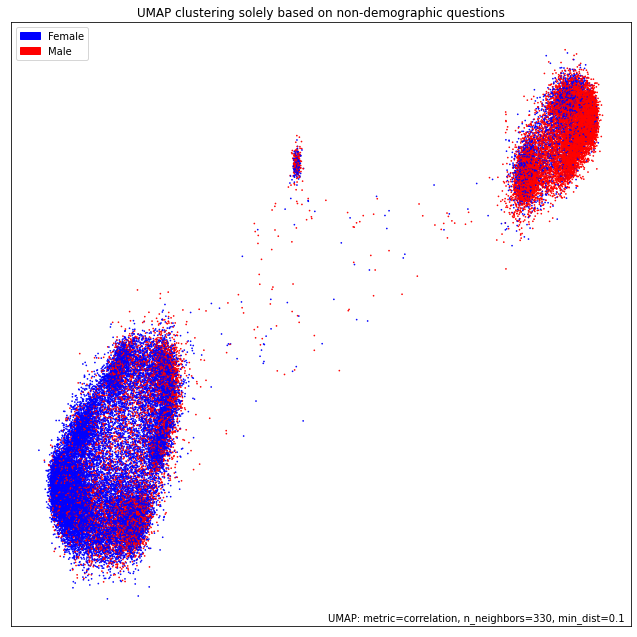

In [ ]:
# Obtaining the umap with the desired specifications
umap_results22 = umap.UMAP(n_neighbors=330, min_dist=0.1, metric='correlation',spread=0.4, a=4, b=0.3).fit(X)

umap.plot.points(umap_results22, labels=y, color_key_cmap='Paired',color_key='rbg')
red_patch = mpatches.Patch(color='red', label='Male')
blue_patch = mpatches.Patch(color='blue', label='Female')

# plt.legend(handles=[red_patch])
plt.legend(handles=[blue_patch, red_patch])
plt.title('UMAP clustering solely based on non-demographic questions')


### SECOND CRITERION ( technical questions Q1 to Q44 and Age, Race, Orientation, test and intro elapses)

In [ ]:
# defing number of coponents for pca
n_components=42
pca = PCA(n_components=n_components)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components5 = pca.fit_transform(X_all)
print(pca.explained_variance_ratio_.sum() * 100)

97.1089636915399


Text(0.5, 1.0, 'UMAP clustering based on all relevant  questions')

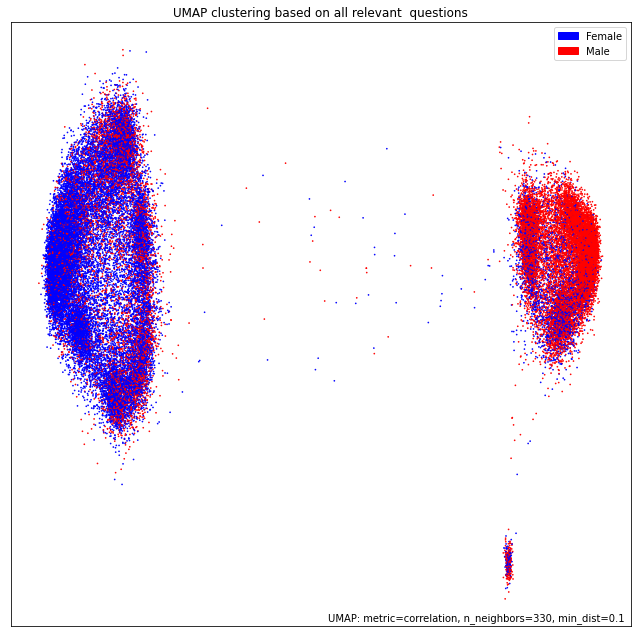

In [ ]:
# plotig umap results
umap_results15 = umap.UMAP(n_neighbors=330, min_dist=0.1, metric='correlation',spread=0.5, a=4, b=0.3).fit(X)

umap.plot.points(umap_results15, labels=y, color_key_cmap='Paired',color_key='rbg')
red_patch = mpatches.Patch(color='red', label='Male')
blue_patch = mpatches.Patch(color='blue', label='Female')

# plt.legend(handles=[red_patch])
plt.legend(handles=[blue_patch, red_patch])
plt.title('UMAP clustering based on all relevant  questions')

In [ ]:
# Applying K-Means clustering
km1 = KMeans(n_clusters=2, random_state=132, n_init=10, tol=0.0001)
#
# Fit the KMeans model
#
kmclusters1=km1.fit_predict(pca_components5)

In [ ]:
# Printing ADJ-RAND and Silhouette metrics
print(metrics.adjusted_rand_score(y, kmclusters1))
print(metrics.silhouette_score(X_all, kmclusters1, metric='cosine'))

0.32546193433639525
0.2252376488278044


In [ ]:
#creating cross tab
pred1 = np.array([1 if x == 1 else 2 if x==2 else 2 for x in kmclusters1]) # adjusting columns for better representation

pd.crosstab(y,pred1) 

col_0,1,2
gender,,
1,16390,6387
2,4347,22876


Text(0.5, 1.0, 'Actual vs Predicted Cross Tab')

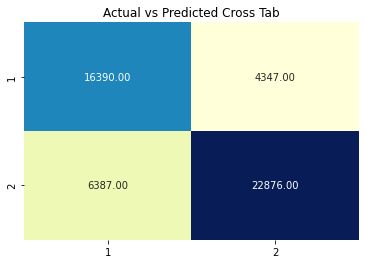

In [ ]:
# ploting the cross tab
res1 = sns.heatmap(pd.crosstab(y,pred1).T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
res1.set_xticklabels(['1','2'])
res1.set_yticklabels(['1','2'])
plt.ylabel("")
plt.xlabel("")
plt.title("Actual vs Predicted Cross Tab")

In [ ]:
# applying Agglomerative clustering to check results
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='correlation',
                                      n_clusters=2)

# Fit model
aggclusters = agg_cluster.fit_predict(X_all)

In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, aggclusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_all, aggclusters, metric='cosine')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.23678240694027325
The silhoutte score of the Agglomerative Clustering solution: 0.1722537547370854


### THIRD CRITERION (only Hetero-sexual participants)

In [ ]:
dfs_O['orientation'].value_counts() # counting orientation values

1    27929
2    11863
3     4994
5     2396
4     2181
0      637
Name: orientation, dtype: int64

In [ ]:
ori=dfs_O.drop(columns=[	'race',	'religion',	'country','IPC',	'source',	'engnat']) # creating a seperate dataset for hetero-sexuals

In [ ]:
oriH=ori[ori['orientation'].isin([1])] # creating a seperate dataset for hetero-sexuals 

In [ ]:
oriH=oriH.drop(columns='orientation') # removing the orientation column since all vales are the same now

In [ ]:
oriH.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,age,education,gender,hand
277758,3,4,5,5,5,2,5,1,5,4,0,1,1,5,5,1,5,2,5,4,5,4,4,2,5,4,5,3,5,5,5,1,4,5,4,2,5,5,3,4,5,1,5,5,57,166,19,2,1,1
28647,2,1,2,3,2,4,5,1,1,2,4,1,3,2,4,1,4,4,4,1,5,2,4,3,2,1,4,1,1,1,5,4,4,1,4,1,4,1,4,1,4,4,4,1,163,168,20,2,1,1
276663,1,5,5,5,1,1,4,4,5,5,1,5,1,3,1,5,5,4,1,5,2,3,5,5,1,1,1,1,1,3,1,5,1,4,1,5,3,1,1,4,5,4,1,5,9,210,30,2,2,1
203388,5,1,5,3,5,5,5,2,5,5,3,3,2,2,4,2,5,5,5,2,5,1,5,1,5,1,5,1,5,1,3,1,1,4,3,1,5,2,5,1,5,1,5,2,9,151,28,3,1,1
165162,5,5,5,1,5,3,4,4,5,4,5,1,5,3,5,1,3,3,5,3,3,3,4,3,3,1,5,1,5,5,3,2,5,1,5,3,5,1,5,1,5,1,5,1,2,314,17,2,1,1


In [ ]:
yh=oriH['gender']  # creating the new target variable
oriht=oriH.drop(columns='gender') # droping the target variable from the X dataset

In [ ]:
orihts= scaler.fit_transform(oriht) # standard scaling the new dataset

In [ ]:
dforihts=pd.DataFrame(orihts)
dforihts.shape

(27929, 49)

In [ ]:
# appling PCA
n_components=41
pca = PCA(n_components=n_components)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components10 = pca.fit_transform(orihts)
print(pca.explained_variance_ratio_.sum() * 100)

97.21687487798619


In [ ]:
#Applying K-MEANS
km2 = KMeans(n_clusters=2, random_state=132, n_init=10, tol=0.0001)
#
# Fit the KMeans model
#
kmclusters2=km2.fit_predict(pca_components10)

In [ ]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(yh, kmclusters2)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(orihts, kmclusters2, metric='cosine')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.5209697707061608
The silhoutte score of the Agglomerative Clustering solution: 0.270882156385143


In [ ]:
pred = np.array([1 if x == 1 else 2 if x==2 else 2 for x in kmclusters2])

pd.crosstab(yh,pred) 

col_0,1,2
gender,,
1,12045,2386
2,1499,11999


Text(0.5, 1.0, 'Actual vs Predicted Cross Tab')

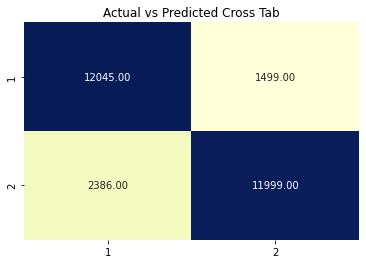

In [ ]:
#Plotting the cross tab
res = sns.heatmap(pd.crosstab(yh,pred).T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
# res.set_xticklabels(['Male','Female'])
# res.set_yticklabels(['Male','Female'])
plt.ylabel("")
plt.xlabel("")
plt.title("Actual vs Predicted Cross Tab")

In [ ]:
yh.value_counts() # target variable value counts, 1 is male , 2 is female

1    14431
2    13498
Name: gender, dtype: int64

Text(0.5, 1.0, 'UMAP clustering based on all relevant  questions_ hetero-sexual participants')

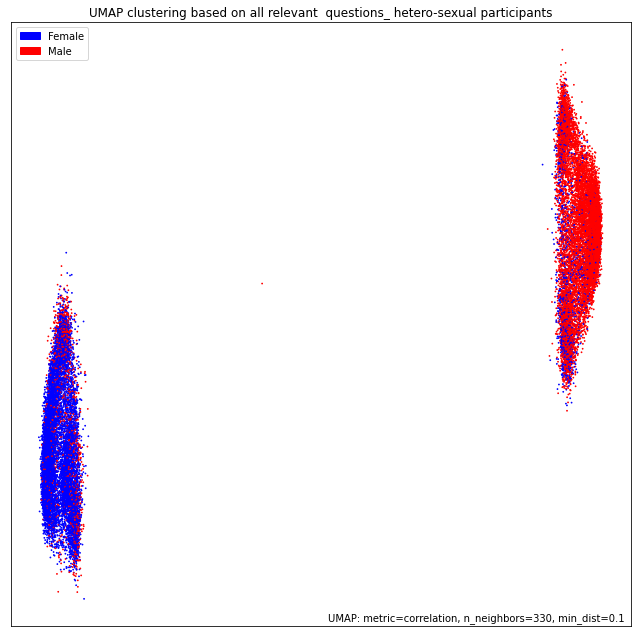

In [ ]:
# umap results for thirs criterion
umap_results20 = umap.UMAP(n_neighbors=330, min_dist=0.1, metric='correlation',spread=0.1, a=4, b=0.3).fit(orihts)

umap.plot.points(umap_results20, labels=yh, color_key_cmap='Paired',color_key='rbg')
red_patch = mpatches.Patch(color='red', label='Male')
blue_patch = mpatches.Patch(color='blue', label='Female')

# plt.legend(handles=[red_patch])
plt.legend(handles=[blue_patch, red_patch])
plt.title('UMAP clustering based on all relevant  questions_ hetero-sexual participants')